In [2]:
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install --upgrade pip
%pip install --upgrade setuptools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install keras scikit-learn tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
#from keras.wrappers.scikit_learn import KerasRegressor
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [133]:
Dataset_WF_site1 = pd.read_excel(r'C:\Users\udish\Downloads\Project - ML\Renewable-energy-generation-input-feature-variables-analysis\data_processed\wind_farms\Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'C:\Users\udish\Downloads\Project - ML\Renewable-energy-generation-input-feature-variables-analysis\data_processed\wind_farms\Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site3 = pd.read_excel(r'C:\Users\udish\Downloads\Project - ML\Renewable-energy-generation-input-feature-variables-analysis\data_processed\wind_farms\Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)

In [134]:
df2 = Dataset_WF_site1.drop(columns=['Wind direction at height of 10 meters (˚)','Wind direction at height of 30 meters (˚)','Wind direction at height of 50 meters (˚)','Atmosphere (hpa)','Relative humidity (%)','Air temperature  (°C) '],axis=1)

In [135]:
df2


,Time(year-month-day h:m:s),Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s),Wind speed - at the height of wheel hub (˚),Power (MW)
1,2019-01-01 00:15:00,1.828,1.698,1.757,1.882,74.367,0.329703
2,2019-01-01 00:30:00,2.193,2.313,2.344,2.350,89.000,0.296306
3,2019-01-01 00:45:00,2.654,2.494,2.574,2.808,82.733,0.187590
4,2019-01-01 01:00:00,2.249,2.192,2.558,2.924,92.967,0.081005
5,2019-01-01 01:15:00,1.974,1.980,2.049,2.137,100.133,0.189721
...,...,...,...,...,...,...,...
70171,2020-12-31 22:45:00,5.738,6.408,6.575,6.680,238.433,13.633642
70172,2020-12-31 23:00:00,5.748,6.231,6.372,6.448,236.833,6.869759
70173,2020-12-31 23:15:00,4.468,4.406,4.381,4.399,261.733,4.352931
70174,2020-12-31 23:30:00,3.730,3.280,3.204,3.446,266.733,7.185250


In [10]:
#train_size = int(len(df2) * 0.8)
#train, test = df2.iloc[:train_size], df2.iloc[train_size:]

In [136]:
df2.set_index('Time(year-month-day h:m:s)')
df2.shape

(70175, 7)

In [137]:

last_column = df2.iloc[:, -1]
first_five_columns = df2.iloc[:, :-1]
df2 = pd.concat([last_column, first_five_columns], axis=1)

In [138]:
df2

,Power (MW),Time(year-month-day h:m:s),Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s),Wind speed - at the height of wheel hub (˚)
1,0.329703,2019-01-01 00:15:00,1.828,1.698,1.757,1.882,74.367
2,0.296306,2019-01-01 00:30:00,2.193,2.313,2.344,2.350,89.000
3,0.187590,2019-01-01 00:45:00,2.654,2.494,2.574,2.808,82.733
4,0.081005,2019-01-01 01:00:00,2.249,2.192,2.558,2.924,92.967
5,0.189721,2019-01-01 01:15:00,1.974,1.980,2.049,2.137,100.133
...,...,...,...,...,...,...,...
70171,13.633642,2020-12-31 22:45:00,5.738,6.408,6.575,6.680,238.433
70172,6.869759,2020-12-31 23:00:00,5.748,6.231,6.372,6.448,236.833
70173,4.352931,2020-12-31 23:15:00,4.468,4.406,4.381,4.399,261.733
70174,7.185250,2020-12-31 23:30:00,3.730,3.280,3.204,3.446,266.733


In [142]:
df2.shape
print("Number of columns:", df2.shape[1])


Number of columns: 7


In [170]:
df2 = df2.set_index('Time(year-month-day h:m:s)')
df2

KeyError: "None of ['Time(year-month-day h:m:s)'] are in the columns"

In [164]:
df2.shape
df2.columns
print(df2.columns.get_loc('Power (MW)'))

0


In [165]:
test_split=round(len(df2)*0.20)
df_for_training=df2[:-14035]
df_for_testing=df2[-14035:]
print(df_for_training.shape)
print(df_for_testing.shape)

(56140, 6)
(14035, 6)


In [166]:

numerical_columns = df_for_training.columns.difference(['Time(year-month-day h:m:s)'])

scaler = MinMaxScaler(feature_range=(0, 1))
df_for_training_scaled = scaler.fit_transform(df_for_training[numerical_columns])
df_for_testing_scaled = scaler.transform(df_for_testing[numerical_columns])
df_for_training_scaled


array([[0.00337261, 0.06222105, 0.20743933, 0.0717848 , 0.05817659,
        0.0592021 ],
       [0.00303098, 0.07769366, 0.24825662, 0.0861182 , 0.07924761,
        0.07898106],
       [0.0019189 , 0.09283565, 0.23077545, 0.10422148, 0.085449  ,
        0.08673091],
       ...,
       [0.48471058, 0.28670612, 0.92831241, 0.30320047, 0.27841162,
        0.28896826],
       [0.51087737, 0.51684465, 0.94597768, 0.587473  , 0.53328537,
        0.52847227],
       [0.62435401, 0.48761861, 0.94616457, 0.52409189, 0.4796656 ,
        0.48773502]])

In [167]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)

n_past is the number of step we will look in the past to predict the next target value.

n_past = 30, means we will use past 30 values (which have all the features including the target column) to predict the 31st target value.

trainX we will have all the feature values\
trainY we will have only target value (Power (MW))


1st Iteration i = 30

(30 - 30:30, 0:6)

(0:30,0:6)



In [168]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (56110, 30, 6)
trainY Shape--  (56110,)


In [17]:
print("trainX[0]-- \n",trainX[0])
print("trainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.00337261 0.06222105 0.20743933 0.0717848  0.05817659 0.0592021 ]
 [0.00303098 0.07769366 0.24825662 0.0861182  0.07924761 0.07898106]
 [0.0019189  0.09283565 0.23077545 0.10422148 0.085449   0.08673091]
 [0.00082862 0.09667074 0.25932218 0.0883173  0.07510193 0.08619179]
 [0.0019407  0.07065163 0.27931102 0.07751816 0.06783842 0.06904104]
 [0.00271117 0.08285119 0.28730823 0.08717848 0.08003563 0.08113754]
 [0.00247131 0.09481932 0.28926081 0.0766935  0.0783568  0.08447335]
 [0.00188256 0.08784342 0.27894003 0.08937758 0.08246822 0.08561898]
 [0.00122111 0.09392667 0.22919665 0.10143334 0.09312365 0.09370578]
 [0.00308186 0.0650643  0.23886471 0.08344787 0.10131223 0.0922232 ]
 [0.00519701 0.07283367 0.28861088 0.08788533 0.07239524 0.05906732]
 [0.01107    0.07709856 0.28981869 0.10115845 0.08058382 0.07072579]
 [0.00549502 0.06470063 0.28721618 0.10021598 0.07321753 0.06102163]
 [0.00159908 0.06175819 0.27810321 0.08867072 0.06975708 0.06348137]
 [0.00741392 0.07362

In [18]:
#y_train = train.pop('Power (MW)')

In [19]:
#X_train = train
#X_train = X_train.drop(columns =('Time(year-month-day h:m:s)'))


In [25]:
%pip install keras==2.12.0



Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 812.7 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.7 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires keras>=3.0.0, but you have keras 2.12.0 which is incompatible.


In [35]:
%pip install --upgrade tensorflow keras


Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.1.1-py3-none-any.whl.metadata (5.6 kB)
Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip uninstall scikeras



^C
Note: you may need to restart the kernel to use updated packages.


In [151]:
from keras.models import Sequential
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [38]:
%pip install scikeras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [169]:
trainX.shape[1],trainX.shape[2]

(30, 6)

In [94]:
# def build_model(optimizer):
#     grid_model = Sequential()
#     grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,5)))
#     grid_model.add(LSTM(50))
#     grid_model.add(Dropout(0.2))
#     grid_model.add(Dense(1))
#     grid_model.compile(loss = 'mse',optimizer = optimizer)
#     return grid_model

# grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
# parameters = {'batch_size' : [16,20],
#               'epochs' : [8,10],
#               'optimizer' : ['adam','Adadelta'] }
# grid_search  = GridSearchCV(estimator = grid_model,
#                             param_grid = parameters,
#                             cv = 2)



In [154]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,6)))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss ='mse',optimizer='adam')
model.summary()
grid_model = KerasRegressor(build_fn=model,verbose=1)
grid_model.fit(trainX, trainY, epochs=5, batch_size=16)



C:\Users\udish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 30, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


C:\Users\udish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3507/3507 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - loss: 0.0081
Epoch 2/5
3507/3507 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - loss: 0.0028
Epoch 3/5
3507/3507 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 0.0026
Epoch 4/5
3507/3507 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - loss: 0.0026
Epoch 5/5
3507/3507 ━━━━━━━━━━━━━━━━━━━━ 53s 15ms/step - loss: 0.0026


ValueError: Could not interpret metric identifier: loss

In [155]:
prediction=model.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
prediction
 [[0.143493  ]
 [0.11556578]
 [0.14860606]
 ...
 [0.0597004 ]
 [0.05350679]
 [0.09674191]]

Prediction Shape- (14005, 1)


In [156]:
prediction_copies_array = np.repeat(prediction,6, axis=-1)
prediction_copies_array

array([[0.143493  , 0.143493  , 0.143493  , 0.143493  , 0.143493  ,
        0.143493  ],
       [0.11556578, 0.11556578, 0.11556578, 0.11556578, 0.11556578,
        0.11556578],
       [0.14860606, 0.14860606, 0.14860606, 0.14860606, 0.14860606,
        0.14860606],
       ...,
       [0.0597004 , 0.0597004 , 0.0597004 , 0.0597004 , 0.0597004 ,
        0.0597004 ],
       [0.05350679, 0.05350679, 0.05350679, 0.05350679, 0.05350679,
        0.05350679],
       [0.09674191, 0.09674191, 0.09674191, 0.09674191, 0.09674191,
        0.09674191]], dtype=float32)

In [157]:
prediction_copies_array.shape

(14005, 6)

In [158]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),6)))[:,0]

In [159]:
original_copies_array = np.repeat(testY,6, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),6)))[:,0]

In [160]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [14.027739 11.297601 14.527588 ...  5.836254  5.230773  9.457397]

Original Values--  [11.833777 13.347995 16.487278 ...  4.352931  7.18525  12.384466]


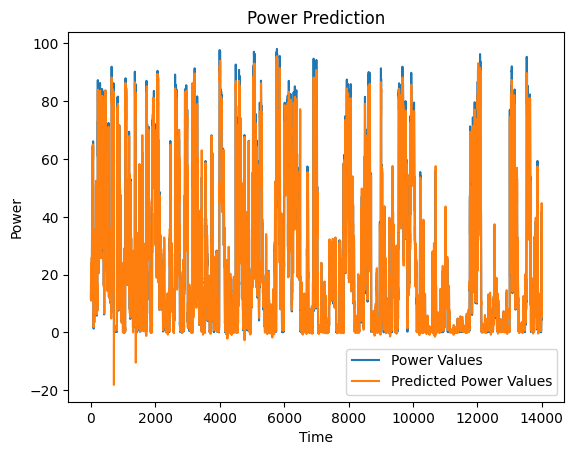

In [161]:
plt.plot(original, label = 'Power Values')
plt.plot(pred, label = 'Predicted Power Values')
plt.title('Power Prediction')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()
plt.show()

In [162]:
history = grid_model.model.history.history
loss_values = history['loss']  # Assuming model is the fitted KerasRegressor object

# Plotting the loss values
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'